In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import import_ipynb
from scipy.stats import zscore
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [2]:
import Delhi_Analysis
import Demand_Data

importing Jupyter notebook from Delhi_Analysis.ipynb
importing Jupyter notebook from Demand_Data.ipynb


In [3]:
df_AHC = pd.concat([Delhi_Analysis.df , Demand_Data.df] , axis = 1)
df_KMEANS = pd.concat([Delhi_Analysis.df , Demand_Data.df] , axis = 1)

In [4]:
#without zscore


In [5]:
#Usinf AHC

c = [i for i in range(1 ,365)]
WCSS = []

for i in range(1 , 365) :
    AHC = AgglomerativeClustering(n_clusters = i , affinity= 'euclidean' , linkage= 'ward')
    df_AHC['cluster'] = AHC.fit_predict(df_AHC)
    wcss = 0
    for j in range (1 , i + 1):
        curr = np.array(df_AHC[df_AHC.cluster == j - 1])
        m = np.array(df_AHC[df_AHC.cluster == j - 1].median())
        w = 0;
        
        for k in range(np.size(curr , axis = 0)) :
            x = np.sum((curr[k] - m) ** 2)
            w += x;
        wcss +=  w
    df_AHC.drop('cluster' , axis = 1 , inplace  = True)
    WCSS.append(wcss)

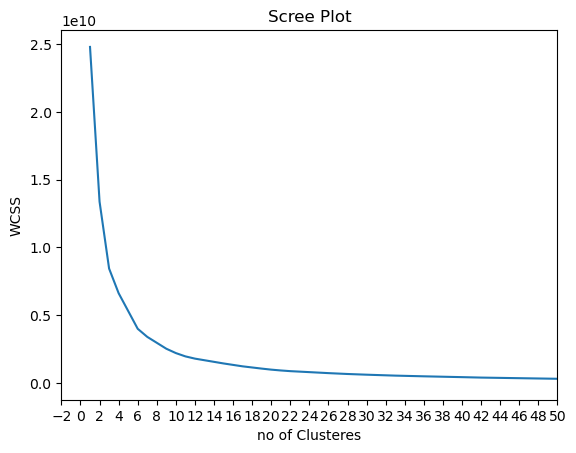

In [6]:
plt.plot(c , WCSS)
plt.xlabel('no of Clusteres')
plt.ylabel('WCSS')
plt.title('Scree Plot')
plt.xlim(-2 , 50)
plt.locator_params('x' , nbins =  50)

In [7]:
AHC = AgglomerativeClustering(n_clusters=6, affinity='euclidean' , linkage='ward')
df_AHC['clusters'] = AHC.fit_predict(df_AHC)
res_AHC = df_AHC.groupby('clusters').median()
res_AHC['size'] = df_AHC.groupby('clusters').size()

res_AHC
df_AHC.groupby('clusters').size()

clusters
0    136
1     38
2    133
3     17
4     38
5      4
dtype: int64

In [8]:
#using kmeans
k_range = range(1 , 367)
wcss = []
for k in k_range : 
    km = KMeans(n_clusters = k)
    km.fit(df_KMEANS)
    wcss.append(km.inertia_)
df_AHC.groupby('clusters').size()

clusters
0    136
1     38
2    133
3     17
4     38
5      4
dtype: int64

clusters
0    136
1     38
2    133
3     17
4     38
5      4
dtype: int64

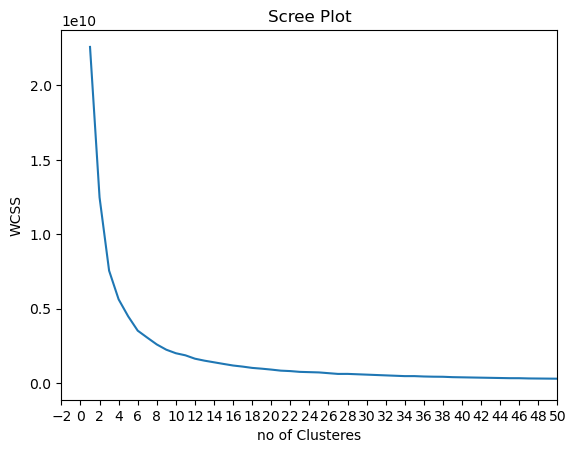

In [9]:
plt.plot(k_range , wcss)
plt.xlabel('no of Clusteres')
plt.ylabel('WCSS')
plt.title('Scree Plot')
plt.xlim(-2 , 50)
plt.locator_params('x' , nbins =  50)
df_AHC.groupby('clusters').size()

In [10]:
print(df_AHC.groupby('clusters').size())
KM = KMeans(n_clusters=6 )
df_KMEANS['clusters'] = KM.fit_predict(df_KMEANS)
res_KMEANS = df_KMEANS.groupby('clusters').median()
res_KMEANS['size'] = df_KMEANS.groupby('clusters').size()
res_KMEANS

clusters
0    136
1     38
2    133
3     17
4     38
5      4
dtype: int64


,DNI(MW),WIND SPEED(MW),Demand(MW),size
clusters,,,,
0,27763.751250,2980.566021,4162.910853,117
1,34784.763750,14386.067947,4594.345018,23
2,35390.216250,2399.121542,4654.842197,145
3,23597.471250,18522.521599,3852.650091,18
4,26002.108125,8851.938465,4028.565798,56
5,28637.583750,32133.537279,4136.663624,7


In [11]:
x = pd.read_csv('Central_Delhi.csv' , header = 10)
df_AHC['MO'] = x['MO']
df_AHC['DY'] = x['DY']
df_KMEANS['MO'] = x['MO']
df_KMEANS['DY'] = x['DY']

In [12]:

#loking for the patteren
pd.set_option('display.max_rows', 10)
df_AHC[df_AHC.clusters == 0]

,DNI(MW),WIND SPEED(MW),Demand(MW),clusters,MO,DY
0,23342.67000,2143.184008,3392.883400,0,1,1
1,24588.72000,1924.768852,4076.847582,0,1,2
2,25130.27250,1390.845116,3727.109256,0,1,3
3,24912.21375,2079.742118,3579.805079,0,1,4
4,25028.83125,3694.475289,4397.674638,0,1,5
...,...,...,...,...,...,...
345,28553.71500,2081.663967,4064.240246,0,12,11
346,29782.19250,3680.598015,3359.150962,0,12,12
356,24490.47375,4410.060775,4368.829208,0,12,22
357,24266.82375,5231.194561,4166.342535,0,12,23


In [13]:
df_KMEANS[df_KMEANS.clusters == 0]

,DNI(MW),WIND SPEED(MW),Demand(MW),clusters,MO,DY
0,23342.67000,2143.184008,3392.883400,0,1,1
1,24588.72000,1924.768852,4076.847582,0,1,2
2,25130.27250,1390.845116,3727.109256,0,1,3
3,24912.21375,2079.742118,3579.805079,0,1,4
4,25028.83125,3694.475289,4397.674638,0,1,5
...,...,...,...,...,...,...
345,28553.71500,2081.663967,4064.240246,0,12,11
346,29782.19250,3680.598015,3359.150962,0,12,12
356,24490.47375,4410.060775,4368.829208,0,12,22
357,24266.82375,5231.194561,4166.342535,0,12,23
